In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

import seaborn as sns

# OLS
import statsmodels.api as sm
# Linear regression
from sklearn.linear_model import LinearRegression
# xgboost
import xgboost as xgb

from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import GridSearchCV # for cross validation
from sklearn.metrics import mean_absolute_error # for model evaluation
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

## 1. Train using train_features.csv

In [3]:
path = "/Users/rubyjiang/Desktop/Keyhole-image-segmentation/application/train_features.csv"
df = pd.read_csv(path)
df.head()

,depth,width_top,width_quarter,width_half,width_3quarter,avg_width,num_white_pixel,perimeter,relative_absorption
0,0,0,0,0,0,0.0,0,0.0,0.402850
1,0,0,0,0,0,0.0,0,0.0,0.446961
2,0,0,0,0,0,0.0,0,0.0,-0.968159
3,0,0,0,0,0,0.0,0,0.0,-0.282654
4,0,0,0,0,0,0.0,0,0.0,0.371854


In [4]:
def get_aspect_ratio(row):
    if row['depth']==0 or row['width_half']==0:
        return 0
    else:
        return row['depth'] / row['width_half']
df['aspect_ratio'] = df.apply(get_aspect_ratio, axis=1)

In [5]:
df.head()

,depth,width_top,width_quarter,width_half,width_3quarter,avg_width,num_white_pixel,perimeter,relative_absorption,aspect_ratio
0,0,0,0,0,0,0.0,0,0.0,0.402850,0.0
1,0,0,0,0,0,0.0,0,0.0,0.446961,0.0
2,0,0,0,0,0,0.0,0,0.0,-0.968159,0.0
3,0,0,0,0,0,0.0,0,0.0,-0.282654,0.0
4,0,0,0,0,0,0.0,0,0.0,0.371854,0.0


In [6]:
# Linear regression
y = df['relative_absorption'].copy()
X = df.drop(['relative_absorption'], axis=1).copy()

In [7]:
df.isnull().any()

depth                  False
width_top              False
width_quarter          False
width_half             False
width_3quarter         False
avg_width              False
num_white_pixel        False
perimeter              False
relative_absorption    False
aspect_ratio           False
dtype: bool

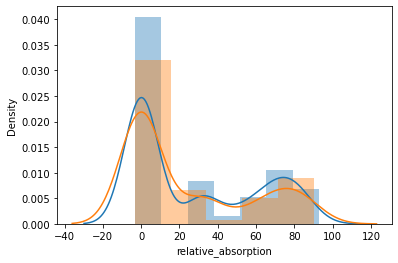

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.75, random_state = 42);
sns.distplot(y_train);
sns.distplot(y_test);

## Linear regression

In [25]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
X_train.columns

Index(['depth', 'width_top', 'width_quarter', 'width_half', 'width_3quarter',
       'avg_width', 'num_white_pixel', 'perimeter', 'aspect_ratio'],
      dtype='object')

In [27]:
lm.coef_

array([ 1.67953212, -0.25422017, -1.55422969, -1.81810184, -2.03143991,
        7.96374044, -0.01993391, -0.37699314,  0.21920366])

In [28]:
lm.intercept_

4.160847970885445

In [29]:
y_train_pred = lm.predict(X_train)
score = r2_score(y_train, y_train_pred)
print("R² Training Score: %.5f "% score)

R² Training Score: 0.88441 


In [30]:
y_val_pred = lm.predict(X_val)
score = r2_score(y_val, y_val_pred)
print("R² Testing Score: %.5f "% score)

R² Testing Score: 0.67410 


## XGBoost

In [31]:
reg_xgb = xgb.XGBRegressor(verbosity=0, 
                           objective='reg:squarederror', 
                           missing=1, 
                           seed=42)
reg_xgb.fit(X_train, 
            y_train, 
            eval_metric= 'mae', #'mae', # 'rmsle', 'rmse'
            early_stopping_rounds=11,
            eval_set=[(X_val, y_val)])

[0]	validation_0-mae:18.62822
[1]	validation_0-mae:14.62234
[2]	validation_0-mae:11.83485
[3]	validation_0-mae:9.85841
[4]	validation_0-mae:8.52458
[5]	validation_0-mae:7.68494
[6]	validation_0-mae:7.11040
[7]	validation_0-mae:6.73050
[8]	validation_0-mae:6.47779
[9]	validation_0-mae:6.29021
[10]	validation_0-mae:6.19307
[11]	validation_0-mae:6.11673
[12]	validation_0-mae:6.07278
[13]	validation_0-mae:6.04545
[14]	validation_0-mae:6.03953
[15]	validation_0-mae:6.04419
[16]	validation_0-mae:6.04206
[17]	validation_0-mae:6.04034
[18]	validation_0-mae:6.05277
[19]	validation_0-mae:6.06098
[20]	validation_0-mae:6.04517
[21]	validation_0-mae:6.05217
[22]	validation_0-mae:6.04014
[23]	validation_0-mae:6.03439
[24]	validation_0-mae:6.02910
[25]	validation_0-mae:6.02649
[26]	validation_0-mae:6.02888
[27]	validation_0-mae:6.03359
[28]	validation_0-mae:6.02558
[29]	validation_0-mae:6.02765
[30]	validation_0-mae:6.03151
[31]	validation_0-mae:6.03061
[32]	validation_0-mae:6.02948
[33]	validation_0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=1,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=0)

In [32]:
y_train_pred = reg_xgb.predict(X_train)
score = r2_score(y_train, y_train_pred)
print("R² Training Score: %.5f "% score)

R² Training Score: 0.94490 


In [33]:
y_val_pred = reg_xgb.predict(X_val)
score = r2_score(y_val, y_val_pred)
print("R² Testing Score: %.5f "% score)

R² Testing Score: 0.90941 


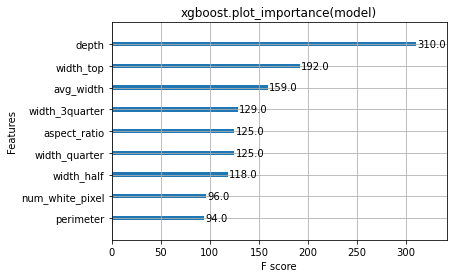

In [34]:
model = reg_xgb
xgb.plot_importance(model)
plt.title("xgboost.plot_importance(model)")
plt.show()

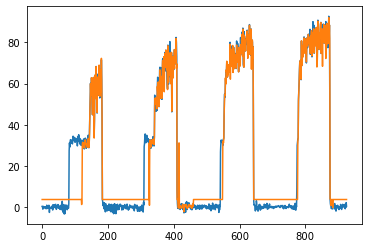

In [35]:
y = df['relative_absorption']
x = np.arange(0,len(y), 1)
yp = model.predict(X)
plt.plot(x,y)
plt.plot(x,yp)

## 2. Test on test_features.csv

In [52]:
path = "/Users/rubyjiang/Desktop/Keyhole-image-segmentation/application/test_features.csv"
df_test = pd.read_csv(path)
df_test['aspect_ratio'] = df_test.apply(get_aspect_ratio, axis=1)
df_test.head()

,depth,width_top,width_quarter,width_half,width_3quarter,avg_width,num_white_pixel,perimeter,relative_absorption,aspect_ratio
0,0,0,0,0,0,0.0,0,0.0,0.82957,0.0
1,0,0,0,0,0,0.0,0,0.0,-0.54691,0.0
2,0,0,0,0,0,0.0,0,0.0,1.68580,0.0
3,0,0,0,0,0,0.0,0,0.0,1.08239,0.0
4,0,0,0,0,0,0.0,0,0.0,0.99812,0.0


In [53]:
y_test = df_test['relative_absorption'].copy()
X_test = df_test.drop(['relative_absorption'], axis=1).copy()

In [54]:
y_test_pred = reg_xgb.predict(X_test)
score = r2_score(y_test, y_test_pred)
print("R² Testing Score: %.5f "% score)

R² Testing Score: 0.81622 


In [55]:
len(y_test)

227

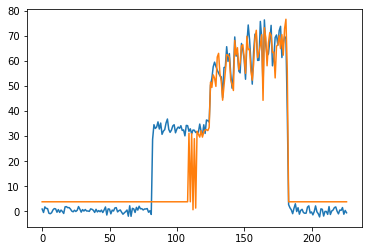

In [56]:
x = np.arange(0,len(y_test), 1)
yp = reg_xgb.predict(X_test)
plt.plot(x,y_test)
plt.plot(x,yp)